Tensorflow version과 Teachable Machine에서 저장한 모델 (.h5) 의 버전 호환성 문제로 에러 발생!
* python 3.9또는 python 3.10에서 tensorflow 2.15 버전을 설치하고 모델을 읽으면 OK
```termial 
    > conda create -n py39_tf215 python=3.9
    > conda activate py39_tf215
    > pip install jupyter ipykernel
    > pip install tensorflow==2.15
```
이 가상환경으로 jupyter notebook 접속

In [ ]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [ ]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model (주의!!! -> 경로에 한글이나 공백이 없도록 단순하게 설정)
model = load_model("data\converted_keras\keras_model.h5", compile=False)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 1280)              410208    
                                                                 
 sequential_3 (Sequential)   (None, 4)                 128500    
                                                                 
Total params: 538708 (2.06 MB)
Trainable params: 524628 (2.00 MB)
Non-trainable params: 14080 (55.00 KB)
_________________________________________________________________


In [ ]:
(224*224 + 1) * 1280

64226560

In [ ]:

# Load the labels
class_names = open("labels.txt", "r").readlines()
class_names

['0 강아지\n', '1 고양이\n', '2 호랑이\n', '3 토끼\n']

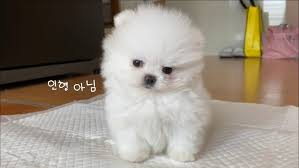

1/1 [==============================] - 0s 96ms/step
Class: 강아지
Confidence Score: 0.99665606


In [21]:

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open(r"05_딥러닝\data\수집데이터\강아지\강아지_5.jpg").convert("RGB")
display(image)
# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)


In [22]:
prediction

array([[0.99665606, 0.00211072, 0.00001572, 0.00121757]], dtype=float32)

In [25]:
prediction[0]

array([0.99665606, 0.00211072, 0.00001572, 0.00121757], dtype=float32)

In [29]:
class_names[prediction[0].argmax()]

'0 강아지\n'